In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
import pgeocode


In [2]:
# Import the data from the CSV file
mls_df = pd.read_csv("Clean_Data/mls_cleaned.csv")
mls_df.head()

C:\Users\David\AppData\Local\Temp\ipykernel_22148\574837584.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  mls_df = pd.read_csv("Clean_Data/mls_cleaned.csv")


,Mortgage Rates,MLS #,Property Type,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
0,2.65,2326882,Single Family Residence,Raleigh,27608,3,4,2450,1,2020,2020-06-24,2021-01-04,700000,770796,194,70796,35.8077,-78.6463
1,2.65,2355109,Single Family Residence,Holly Springs,27540,6,6,4100,3,2012,2020-11-23,2021-01-08,890000,955000,46,65000,35.6263,-78.8458
2,2.65,2354513,Single Family Residence,Durham,27705,4,5,4433,5,2017,2020-11-19,2021-01-05,1219075,1275000,47,55925,36.0218,-78.9478
3,2.65,2345181,Single Family Residence,Chapel Hill,27514,4,3,2314,3,1970,2020-09-27,2021-01-04,680000,730000,99,50000,35.9203,-79.0372
4,2.65,2354571,Single Family Residence,Cary,27519,5,4,3795,1,2009,2020-11-20,2021-01-04,549900,590000,45,40100,35.8072,-78.8870


In [3]:
#List all the values in the Property Type column
mls_df['Property Type'].value_counts()

Property Type
Single Family Residence    112589
Townhouse                   21343
Condo                        4022
Manufactured                 2943
Duplex                        258
Ranch                         128
Other                          21
Farm                           16
Cabin                           4
Triplex                         2
Quadruplex                      1
Name: count, dtype: int64

In [4]:
# Copy the data frame to a new data frame
condo_df = mls_df.copy()

# Keep only the 'Single Family Residence' values in column 'Property Type'
condo_df = condo_df[condo_df['Property Type'] == 'Condo']

# Drop the 'Property Type' column
condo_df = condo_df.drop(columns=['Property Type'])


condo_df.head()

,Mortgage Rates,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
38,2.65,2358250,Elon,27244,3,2,1166,1,1986,2020-12-17,2021-01-07,180000,197500,21,17500,36.1029,-79.5067
65,2.65,2202465,Raleigh,27601,2,2,1251,1,2018,2018-07-09,2021-01-08,575500,587702,914,12202,35.7727,-78.6324
103,2.65,2170728,Raleigh,27601,2,2,1251,1,2018,2018-02-01,2021-01-08,535000,543546,1072,8546,35.7727,-78.6324
131,2.65,2175010,Cary,27511,2,2,1631,1,2019,2018-02-25,2021-01-05,450000,455904,1045,5904,35.7641,-78.7786
136,2.65,2355989,Raleigh,27609,2,2,942,1,1972,2020-12-02,2021-01-07,120000,125200,36,5200,35.8480,-78.6317


In [5]:
condo_df.describe()

,Mortgage Rates,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
count,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4.022000e+03,4.022000e+03,4022.000000,4022.000000,4022.000000,4022.000000
mean,4.860288,27582.185231,2.114371,2.139234,1211.022377,1.047737,1998.844853,3.164240e+05,3.185641e+05,89.987568,2140.125808,35.836770,-78.811351
std,1.764637,206.232515,0.739242,0.794164,544.980100,0.417485,404.436625,2.073207e+05,2.057952e+05,162.115017,20880.020179,0.183086,0.292711
min,2.650000,23927.000000,0.000000,1.000000,-19996.000000,1.000000,1854.000000,4.500000e+04,4.950000e+04,0.000000,-200000.000000,33.883600,-82.175200
25%,3.020000,27517.000000,2.000000,2.000000,939.000000,1.000000,1983.000000,1.950000e+05,2.000000e+05,33.000000,-5000.000000,35.772700,-78.947800
50%,5.100000,27604.000000,2.000000,2.000000,1149.500000,1.000000,1997.000000,2.650000e+05,2.680000e+05,45.000000,0.000000,35.852000,-78.744700
75%,6.700000,27613.000000,3.000000,3.000000,1405.750000,1.000000,2006.000000,3.747070e+05,3.720702e+05,73.000000,9193.750000,35.918200,-78.653000
max,7.790000,28746.000000,5.000000,7.000000,4532.000000,8.000000,27606.000000,2.600000e+06,2.600000e+06,1478.000000,500000.000000,36.624000,-76.740200


In [6]:
condo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4022 entries, 38 to 141292
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mortgage Rates  4022 non-null   float64
 1   MLS #           4022 non-null   object 
 2   City            4022 non-null   object 
 3   Zip             4022 non-null   int64  
 4   Bedrooms        4022 non-null   int64  
 5   Total Baths     4022 non-null   int64  
 6   SqFt            4022 non-null   int64  
 7   Acres           4022 non-null   int64  
 8   Year Built      4022 non-null   int64  
 9   List Date       4022 non-null   object 
 10  Closing Date    4022 non-null   object 
 11  List Price      4022 non-null   int64  
 12  Sold Price      4022 non-null   int64  
 13  Days on Market  4022 non-null   int64  
 14  Over Asking     4022 non-null   int64  
 15  Lat             4022 non-null   float64
 16  Lon             4022 non-null   float64
dtypes: float64(3), int64(10), object(4)

In [7]:
#Create a copy of the data frame and drop the non-numeric columns
condo_nostr_df = condo_df.copy()
condo_nostr_df = condo_nostr_df.drop(columns=['City'])
condo_nostr_df = condo_nostr_df.drop(columns=['List Date'])
condo_nostr_df = condo_nostr_df.drop(columns=['Closing Date'])
condo_nostr_df = condo_nostr_df.drop(columns=['MLS #'])

#Create a correlation matrix
corr_matrix = condo_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.994918
SqFt              0.492272
Total Baths       0.310607
Days on Market    0.260160
Bedrooms          0.199994
Mortgage Rates    0.147387
Lon               0.078496
Zip               0.028250
Acres             0.026070
Lat               0.009995
Year Built        0.003419
Over Asking      -0.022597
Name: Sold Price, dtype: float64

array([[<Axes: xlabel='Sold Price', ylabel='Sold Price'>,
        <Axes: xlabel='SqFt', ylabel='Sold Price'>,
        <Axes: xlabel='Total Baths', ylabel='Sold Price'>,
        <Axes: xlabel='Bedrooms', ylabel='Sold Price'>,
        <Axes: xlabel='Lat', ylabel='Sold Price'>,
        <Axes: xlabel='Lon', ylabel='Sold Price'>],
       [<Axes: xlabel='Sold Price', ylabel='SqFt'>,
        <Axes: xlabel='SqFt', ylabel='SqFt'>,
        <Axes: xlabel='Total Baths', ylabel='SqFt'>,
        <Axes: xlabel='Bedrooms', ylabel='SqFt'>,
        <Axes: xlabel='Lat', ylabel='SqFt'>,
        <Axes: xlabel='Lon', ylabel='SqFt'>],
       [<Axes: xlabel='Sold Price', ylabel='Total Baths'>,
        <Axes: xlabel='SqFt', ylabel='Total Baths'>,
        <Axes: xlabel='Total Baths', ylabel='Total Baths'>,
        <Axes: xlabel='Bedrooms', ylabel='Total Baths'>,
        <Axes: xlabel='Lat', ylabel='Total Baths'>,
        <Axes: xlabel='Lon', ylabel='Total Baths'>],
       [<Axes: xlabel='Sold Price', ylabel='Be

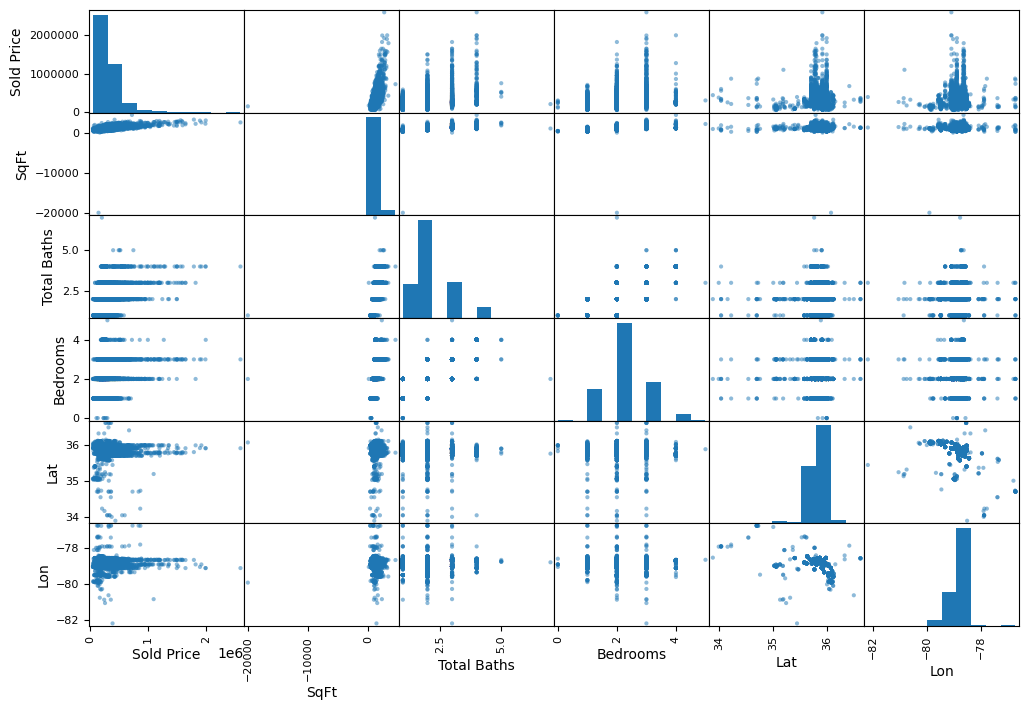

In [8]:
#Visualize the scatter matrix
scatter_columns = ["Sold Price", "SqFt", "Total Baths", "Bedrooms", 'Lat', 'Lon']
scatter_matrix(condo_nostr_df[scatter_columns], figsize=(12, 8))
#plt.savefig('matrix.png')

<Axes: xlabel='SqFt', ylabel='Sold Price'>

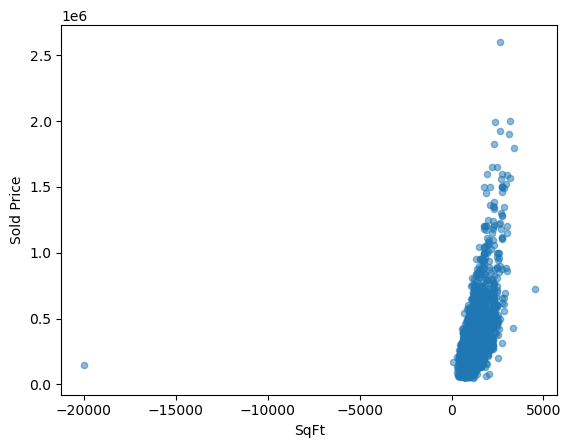

In [9]:
#Visualize the scatter plot for Total Living Area SqFt vs Sold Price
condo_nostr_df.plot(kind="scatter", x="SqFt", y="Sold Price", alpha=0.5)
#plt.savefig('scatter.png')

In [ ]:
#Create a new column for the price per square foot
condo_nostr_df['Price per SqFt'] = condo_nostr_df['Sold Price'] / condo_nostr_df['SqFt']

#Create a correlation matrix to see what the correlation is for Price per SqFt
corr_matrix = condo_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

In [ ]:
#Check the orginal data frame to see how many cities are in the data
len(condo_df['City'].value_counts())

In [ ]:
#Cluster the Lat and  Lon into groups
from sklearn.cluster import KMeans
condo_df['Cluster'] = KMeans(n_clusters=5).fit_predict(condo_df[['Lat', 'Lon']])
condo_df.plot(kind="scatter", x="Lon", y="Lat", c="Cluster", cmap='viridis', colorbar=False, alpha=0.5)
plt.title('Clustered Lat and Lon')
plt.savefig('clustered.png')


In [ ]:
#Create a variable for the top 10 cities with the highest average sold price
top10 = condo_df.groupby('City')['Sold Price'].mean().nlargest(373).reset_index()

#Plot the top 10 cities with the highest average sold price
fig = px.bar(top10, x='City', y='Sold Price',color='City', template='plotly',
             title='Cities with Highest Avg. Sold Price') 
fig.update_traces(textposition='outside')
fig.show()

In [ ]:
top10 = condo_df.groupby('City')['Total Baths'].mean().nlargest(10).reset_index()

fig = px.bar(top10, x='City', y='Total Baths',color='Total Baths', template='plotly', 
             title='Top 10 Cities with the Most Avg Total Baths')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [ ]:
df_mean = condo_df.groupby('Over Asking')['SqFt'].mean().reset_index()

fig = px.scatter(df_mean, x='Over Asking', y='SqFt', trendline='ols', 
                 labels={'Over Asking':'Over Asking', 'SqFt':'Mean House Size'})
fig.update_layout(title='Distribution of Mean House Size by Over Asking')
fig.show()

In [ ]:
fig = px.scatter(condo_df, x='SqFt', y='Over Asking', color='Bedrooms', size='Total Baths',trendline='ols')
fig.update_layout(title='House Size vs Over Asking',
                  xaxis_title='House Size',
                  yaxis_title='Over Asking')
fig.show()

In [ ]:
condo_df.hist(bins=5, figsize=(20,15))
#plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
condo_df.head()

In [ ]:
# Variable with the Longitude and Latitude
X=condo_df.loc[:,['MLS #','Lat','Lon']]
X.head(10)

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = condo_df[['Lat']]
X_axis = condo_df[['Lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

In [ ]:
X.plot.scatter(x = 'Lat', y = 'Lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
#Visualize the distribution of each numerical feature using box plots. Points beyond the “whiskers” of the box plot can be considered potential outliers.  
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['SqFt'], color='lightgreen')

In [ ]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Bedrooms'], color='lightgreen')

In [ ]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Total Baths'], color='lightgreen')

In [ ]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Acres'], color='lightgreen')

In [ ]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Days on Market'], color='lightgreen')

In [ ]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Year Built'], color='lightgreen')

In [ ]:
#Find the row with the value of 44 in the 'Bedrooms' column
condo_df.loc[condo_df['Bedrooms'] == 44]

#Drop the row with the value of 44 in the 'Bedrooms' column
condo_df = condo_df[condo_df['Bedrooms'] != 44]


In [ ]:
#Find the row with the most 'Total Baths'
max_idx = condo_df['Bedrooms'].idxmax()
row_with_max_total_baths = condo_df.loc[max_idx]

row_with_max_total_baths

In [ ]:
#Drop the row with the value of 44 in the 'Bedrooms' column
condo_df = condo_df[condo_df['Bedrooms'] != 43]
condo_df = condo_df[condo_df['Bedrooms'] != 0]


In [ ]:
#Find the row with the most 'Total Baths'
max_idx = condo_df['Bedrooms'].idxmax()
row_with_max_total_baths = condo_df.loc[max_idx]

row_with_max_total_baths

In [ ]:
#Find the row with the most 'Total Baths'
max_idx = condo_df['Total Baths'].idxmax()
row_with_max_total_baths = condo_df.loc[max_idx]

row_with_max_total_baths

In [ ]:
#Drop the row with the value of 34 in the 'Total Baths' column
condo_df = condo_df[condo_df['Total Baths'] != 34]
condo_df = condo_df[condo_df['Total Baths'] != 0]

In [ ]:
#Find the row with the most 'Total Baths'
max_idx = condo_df['Total Baths'].idxmax()
row_with_max_total_baths = condo_df.loc[max_idx]

row_with_max_total_baths

In [ ]:
#Drop the row with the value of 34 in the 'Total Baths' column
condo_df = condo_df[condo_df['Total Baths'] != 32]


In [ ]:
#Find the row with the most 'Total Baths'
max_idx = condo_df['Total Baths'].idxmax()
row_with_max_total_baths = condo_df.loc[max_idx]

row_with_max_total_baths

In [ ]:
#Drop the row with the value of 26 in the 'Total Baths' column
condo_df = condo_df[condo_df['Total Baths'] != 26]

In [ ]:
#Find the row with the most 'Total Baths'
max_idx = condo_df['Total Baths'].idxmax()
row_with_max_total_baths = condo_df.loc[max_idx]

row_with_max_total_baths

In [ ]:
#Drop the row with the value of 26 in the 'Total Baths' column
condo_df = condo_df[condo_df['Total Baths'] != 23]

In [ ]:
#Find the row with the most 'Total Baths'
max_idx = condo_df['Total Baths'].idxmax()
row_with_max_total_baths = condo_df.loc[max_idx]

row_with_max_total_baths

In [ ]:
#Find the row with the most 'Total Baths'
max_idx = condo_df['Year Built'].idxmax()
row_with_max_total_baths = condo_df.loc[max_idx]

row_with_max_total_baths

In [ ]:
condo_df.sort_values('Year Built', ascending=True)

In [ ]:
condo_df = condo_df[condo_df['Year Built'] != 0]
condo_df = condo_df[condo_df['Year Built'] != 1]
condo_df = condo_df[condo_df['Year Built'] != 3]
condo_df = condo_df[condo_df['Year Built'] != 97]
condo_df = condo_df[condo_df['Year Built'] != 202]

condo_df.sort_values('Year Built', ascending=True)

In [ ]:
condo_df.sort_values('Year Built', ascending=False)

In [ ]:
# Edit the first occurrence of '3837737' in the 'List Price' column to '383737'
index = (condo_df['Year Built'] == 20223).idxmax()
condo_df.loc[index, 'Year Built'] = 2023

In [ ]:
condo_df.sort_values('Year Built', ascending=False)

In [ ]:
index = (condo_df['Year Built'] == 20211).idxmax()
condo_df.loc[index, 'Year Built'] = 2021

In [ ]:
condo_df.sort_values('Year Built', ascending=False)

In [ ]:
index = (condo_df['Year Built'] == 20116).idxmax()
condo_df.loc[index, 'Year Built'] = 2016

In [ ]:
condo_df.sort_values('Year Built', ascending=False)

In [ ]:
index = (condo_df['Year Built'] == 20023).idxmax()
condo_df.loc[index, 'Year Built'] = 2023

In [ ]:
condo_df.sort_values('Year Built', ascending=False)

In [ ]:
index = (condo_df['Year Built'] == 20006).idxmax()
condo_df.loc[index, 'Year Built'] = 2006

In [ ]:
condo_df.sort_values('Year Built', ascending=False)


In [ ]:
index = (condo_df['Year Built'] == 19496).idxmax()
condo_df.loc[index, 'Year Built'] = 1949

In [ ]:
condo_df.sort_values('Year Built', ascending=False)


In [ ]:
condo_df = condo_df[condo_df['Year Built'] != 3023]
condo_df = condo_df[condo_df['Year Built'] != 2083]
condo_df = condo_df[condo_df['Year Built'] != 2121]



#Remove all the rows where the 'SqFt' is less than 100
condo_df = condo_df[condo_df['SqFt'] > 199]

condo_df.sort_values('Year Built', ascending=False)


In [ ]:
condo_df.sort_values('Year Built', ascending=True)


In [ ]:
condo_df = condo_df[condo_df['Year Built'] != 1073]
condo_df = condo_df[condo_df['Year Built'] != 1577]
condo_df = condo_df[condo_df['Year Built'] != 1647]

In [ ]:
condo_df.sort_values('Year Built', ascending=False)


In [ ]:
#Add the Price per SqFt to this data frame
condo_df["Price per SqFt"] = condo_df["Sold Price"]/condo_df["SqFt"]
condo_df.head()

In [ ]:
# Save the DataFrame to a CSV file
condo_df.to_csv('Clean_Data/mls_condo_cleaned_2.csv', index=False)

In [ ]:
condo_df.sort_values('Zip', ascending=False)
